In [1]:
#Part 1 reading and cleaning the data
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

#Reading the data
f_appl = pd.read_csv('AAPL.csv')
f_msft = pd.read_csv('MSFT.csv')
f_goog = pd.read_csv('GOOG.csv')
f_amzn = pd.read_csv('AMZN.csv')

#printing info about datasets
print("Apple info")
f_appl.info()
print("MSFT info")
f_msft.info()
print("GOOG info")
f_goog.info()
print("AMZN info")
f_amzn.info()

#to check if data is is clean
# to check for any null data i.e. missing data we use .isna()
print ("Number of null values in Apple: ",f_appl.isna().sum() )
print ("Number of null values in MS: ",f_msft.isna().sum() )
print ("Number of null values in Google: ",f_goog.isna().sum() )
print ("Number of null values in Amazon: ",f_amzn.isna().sum() )

Apple info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB
MSFT info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null

In [2]:
#part2 Converting dataset to timeseries
from datetime import datetime

#converting the dataset to time series
f_appl['Date'] = pd.to_datetime(f_appl['Date'])
f_appl.set_index('Date', inplace = True , drop = False)

f_msft['Date'] = pd.to_datetime(f_msft['Date'])
f_msft.set_index('Date', inplace = True, drop = False)

f_goog['Date'] = pd.to_datetime(f_goog['Date'])
f_goog.set_index('Date', inplace = True, drop = False)

f_amzn['Date'] = pd.to_datetime(f_amzn['Date'])
f_amzn.set_index('Date', inplace = True, drop = False)

f_appl.info()


#now it is time series



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2019-09-16 to 2020-09-11
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 15.7 KB


In [3]:
# part3 to determin the traded amount we use Volume so

print ("apple total stock traded: ", f_appl['Volume'].sum() )
print ("f_amzn total stock traded: ", f_amzn['Volume'].sum() )
print ("f_msft total stock traded: ",f_msft['Volume'].sum())
print ("f_goog total stock traded: ", f_goog['Volume'].sum() )
print()
print("Max of them", np.array(np.max([f_appl['Volume'].sum(), 
                                      f_msft['Volume'].sum(),
                                      f_amzn['Volume'].sum(),
                                      f_goog['Volume'].sum()])) ) 
print()
print ("apple total stock traded: ", "%12.3f"  % (f_appl['Volume'].mean()) )
print ("f_amzn total stock traded: ","%12.3f"  % f_amzn['Volume'].mean() )
print ("f_msft total stock traded: ", "%12.3f"  %f_msft['Volume'].mean())
print ("f_goog total stock traded: ", "%12.3f"  %f_goog['Volume'].mean() )

apple total stock traded:  33353208000
f_amzn total stock traded:  1120309300
f_msft total stock traded:  8957028600
f_goog total stock traded:  445806300

Max of them 33353208000

apple total stock traded:  132881306.773
f_amzn total stock traded:   4463383.665
f_msft total stock traded:  35685372.908
f_goog total stock traded:   1776120.717


In [4]:
#part 4 to print Adj Close we extract these columns first

f_appl_y = list(f_appl['Adj Close'])
f_amzn_y = list(f_amzn['Adj Close'])
f_msft_y = list(f_msft['Adj Close'])
f_goog_y = list(f_goog['Adj Close'])

#for the x-axis 
all_fig_x = list(f_appl['Date'])

#print (all_fig_x)


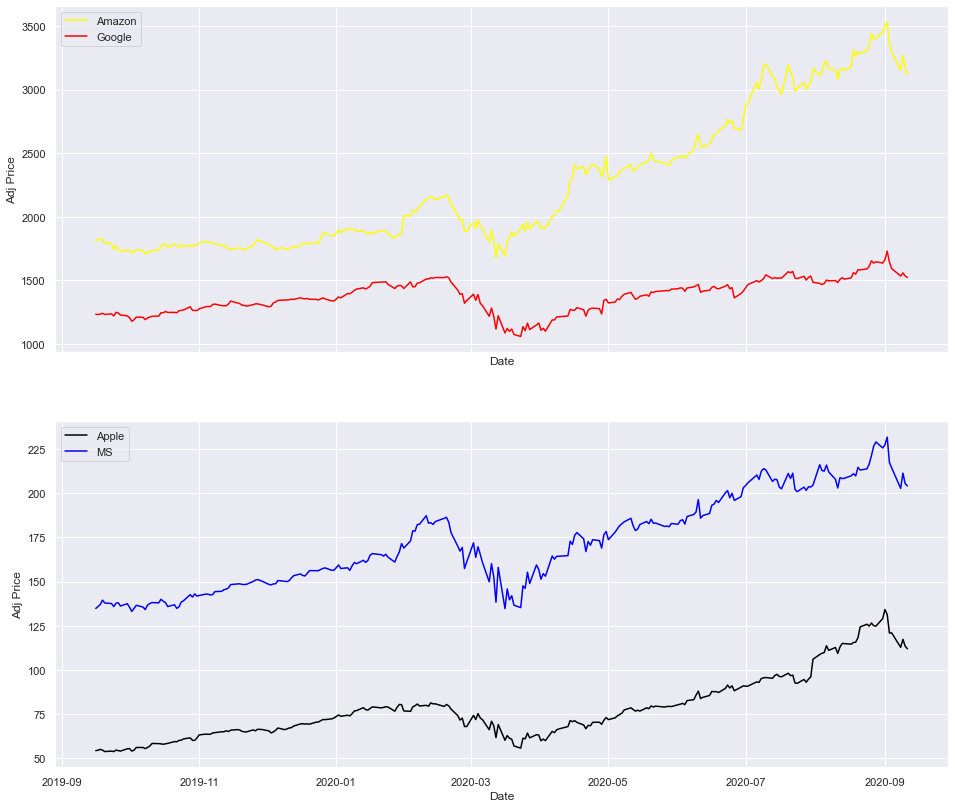

In [5]:
# ploting 2 rows and 1 column
fig, (ax , ax2)= plt.subplots(2 , 1, figsize = (16 , 14) , sharex=True  )
ax2.plot(all_fig_x , f_appl_y ,color='black',label='Apple' )
ax.plot(all_fig_x , f_amzn_y ,color='yellow',label='Amazon' )
ax.plot(all_fig_x , f_goog_y ,color='red',label='Google' )
ax2.plot(all_fig_x , f_msft_y ,color='blue',label='MS' )
# we separate the graphs to fix the Adj Price difference
ax.set_xlabel('Date')
ax.set_ylabel("Adj Price")
ax.legend()

ax2.set_xlabel('Date')
ax2.set_ylabel("Adj Price")
ax2.legend()
#fig, ax = plt.subplots(2,2,figsiz = (16 , 14) , sharey=True )


In [6]:
#Part5 Find the average Low price for all four stocks between the dates 03/15/2020 (included) and 06/15/2020 (excluded).
# to extract specific dates range
applLow = f_appl[(f_appl['Date']>=datetime(2020,3,14))]
applLow =  applLow[(f_appl['Date']<datetime(2020,6,14))]
print ("Apple Average Low Price between 2020,3,14 and 2020,6,14  :", "%5.3f $" %applLow['Low'].mean())

googLow = f_goog[(f_goog['Date']>=datetime(2020,3,14))]
googLow =  googLow[(f_goog['Date']<datetime(2020,6,14))]
print ("Google Average Low Price between 2020,3,14 and 2020,6,14:", "%5.3f $" %googLow['Low'].mean())
msftLow = f_msft[(f_msft['Date']>=datetime(2020,3,14))]
msftLow =  msftLow[(f_appl['Date']<datetime(2020,6,14))]
print ("MS Average Low Price between 2020,3,14 and 2020,6,14:", "%5.3f $" %msftLow['Low'].mean())
amznLow = f_amzn[(f_amzn['Date']>=datetime(2020,3,14))]
amznLow =  amznLow[(f_appl['Date']<datetime(2020,6,14))]
print ("Amazon Average Low Price between 2020,3,14 and 2020,6,14:", "%5.3f $" %amznLow['Low'].mean())
#new = f_appl.loc(mask)
#f_amzn_yL = list(f_amzn['Low'])
#f_msft_yL = list(f_msft['Low'])
#f_goog_yL = list(f_goog['Low'])

Apple Average Low Price between 2020,3,14 and 2020,6,14  : 71.060 $
Google Average Low Price between 2020,3,14 and 2020,6,14: 1268.480 $
MS Average Low Price between 2020,3,14 and 2020,6,14: 168.983 $
Amazon Average Low Price between 2020,3,14 and 2020,6,14: 2223.296 $


<ipython-input-6-c1fdf1a4980e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  applLow =  applLow[(f_appl['Date']<datetime(2020,6,14))]
<ipython-input-6-c1fdf1a4980e>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  googLow =  googLow[(f_goog['Date']<datetime(2020,6,14))]
<ipython-input-6-c1fdf1a4980e>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  msftLow =  msftLow[(f_appl['Date']<datetime(2020,6,14))]
<ipython-input-6-c1fdf1a4980e>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amznLow =  amznLow[(f_appl['Date']<datetime(2020,6,14))]


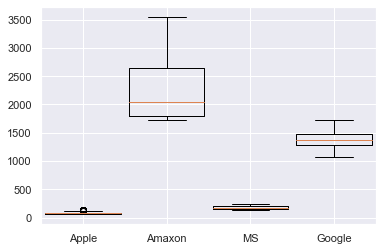

In [7]:
#part5 Plot in the same figure the boxplot of High prices for the whole period of all four stocks.
f_appl_y2 = list(f_appl['High'])
f_amzn_y2 = list(f_amzn['High'])
f_msft_y2 = list(f_msft['High'])
f_goog_y2 = list(f_goog['High'])
all_fig_x = list(f_appl['Date'])
#plt.s
#plt.boxplot()
plt.boxplot( x = [f_appl_y2,f_amzn_y2, f_msft_y2, f_goog_y2], labels=["Apple","Amaxon","MS", "Google"], widths=0.9 );

#plt.figlegend()
#print (all_fig_x)


In [8]:
#Part 7
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
#applPrice = f_appl[(f_appl['Date']>=datetime(2020,3,14))]
#applPrice =  applPrice[(f_appl['Date']<datetime(2020,6,14))]
#print (applLow['Low'].mean())
applLow['Date'] = [mdates.date2num(d) for d in applLow['Date']]
 
# Re-arrange data so that each row contains values of a day: 'date','open','high','low','close'.
quotes = [tuple(x) for x in applLow[['Date','Open','High','Low','Close', 'Adj Close', 'Volume']].values]
MA10 =  applLow.iloc[:,1].rolling(window=10).mean()
MA20 =  applLow.iloc[:,1].rolling(window=20).mean()
#applLow.rolling()
#print(MA10)

C:\Users\alalw_lm4oxfo\Anaconda\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


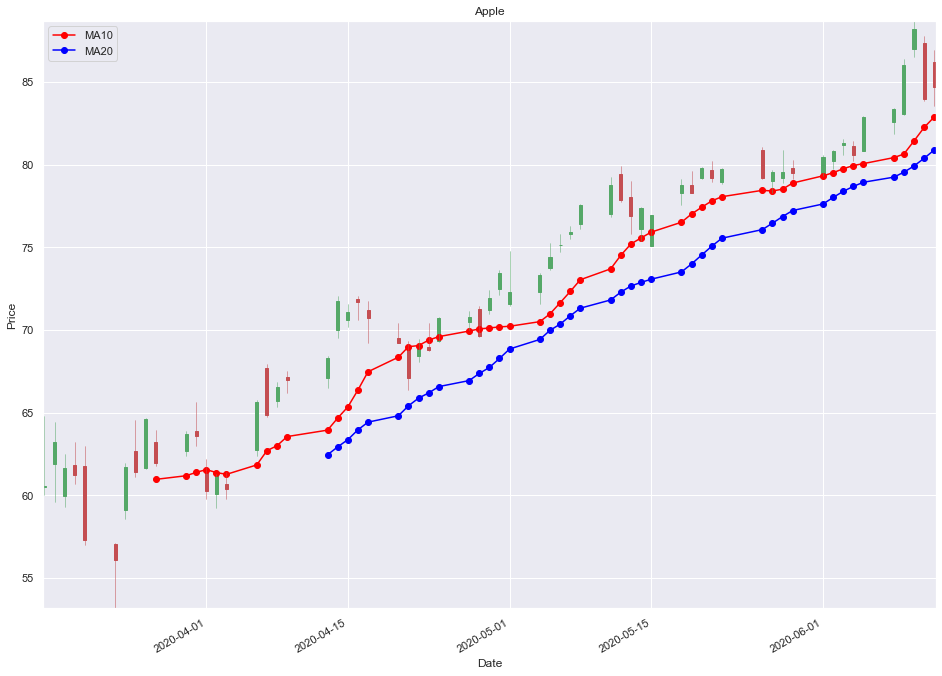

In [9]:
# Convert 'Timestamp' to 'float'.
#   candlestick_ohlc needs time to be in float days format - see date2num().
#f_appl = pd.read_csv('AAPL.csv')

# Plot candlestick.
##########################
fig, ax = plt.subplots(figsize = (16,12))
ax.plot(list(applLow['Date']), list(MA10),color='red',marker='o',label='MA10')
ax.plot(list(applLow['Date']), list(MA20),color='blue',marker='o',label='MA20')
candlestick_ohlc(ax, quotes, width=0.3, colorup='g', colordown='r');
# Customize graph.
##########################
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple')
ax.legend()
    
# Format time.
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
 
plt.gcf().autofmt_xdate()   # Beautify the x-labels
plt.autoscale(tight=True)
 
